In [1]:
import random
import matplotlib.pyplot as plt

# Experiments
import sys
sys.path.append('../..')

from model.amm.basilisk_amm import ConstantProductPoolState
from model.amm.agents import Agent
from model.amm.global_state import GlobalState, fluctuate_prices
from model.amm.trade_strategies import random_swaps

from model import run, plot_utils, processing

# same seed, same parameters = same simulation result
random.seed(42)

initial_state = GlobalState(
    pools = {
        'R1/R2': ConstantProductPoolState(
            tokens={
                'R1': 500000,
                'R2': 1500000
            },
            trade_fee=0.1
        )
    },
    agents = {
        'Trader': Agent(
            holdings={'R1': 1000000, 'R2': 1000000},
            trade_strategy=random_swaps(pool_id='R1/R2', amount={'R1': 333, 'R2': 1000}, randomize_amount=True)
        )
    },
    external_market={
        'R1': 3,
        'R2': 1
    },
    evolve_function = fluctuate_prices(volatility={'R1': 1, 'R2': 1}, trend={'R1': 0.1, 'R2': 0.1})
)

events = run.run(initial_state, time_steps=10000, use_cadcad=False)
events = processing.postprocessing(events, optional_params=['holdings_val'])

# do the exact same thing again, but with cadCAD this time
random.seed(42)
events2 = run.run(initial_state, time_steps=10000, use_cadcad=True)
events2 = processing.postprocessing(events2, optional_params=['holdings_val'])

Starting simulation...
Execution time: 1.962 seconds.

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (10000, 1, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 6.69s


<AxesSubplot:title={'center':'asset price: USD   '}>

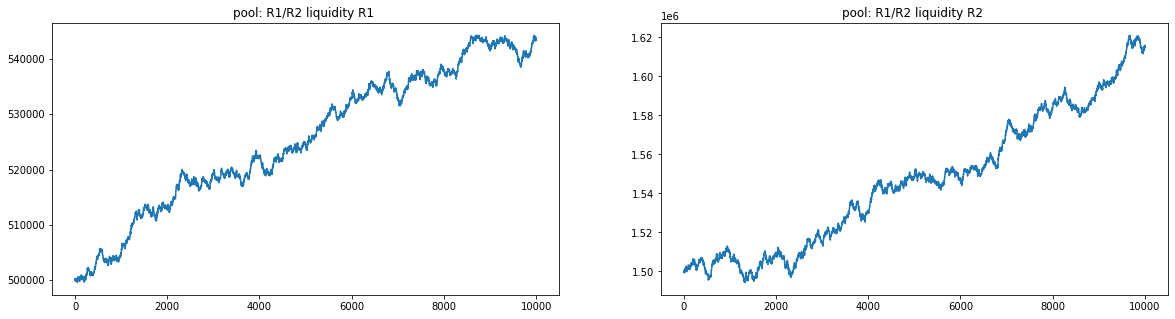

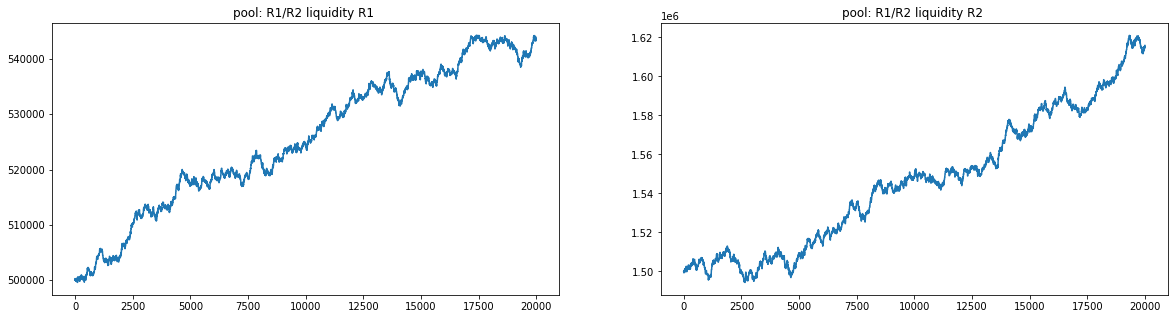

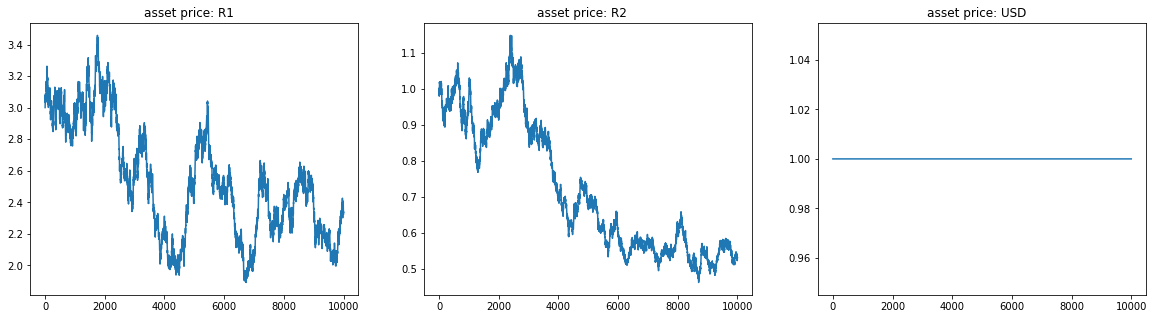

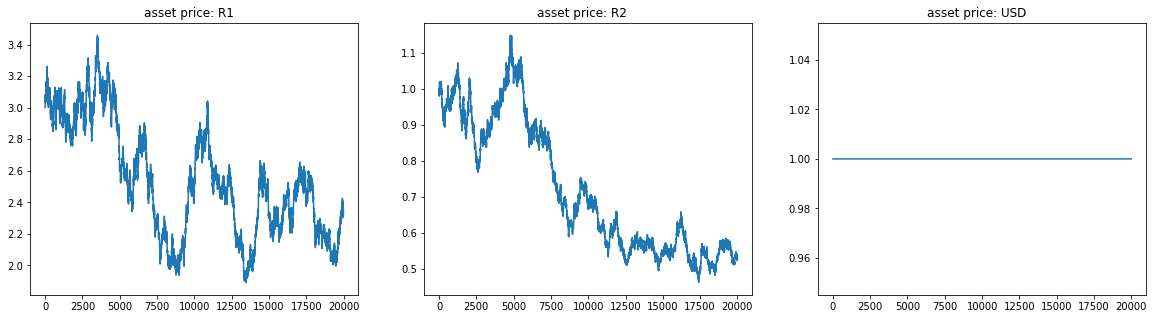

In [2]:
plot_utils.plot(events, pool='R1/R2', prop='liquidity')
plot_utils.plot(events2, pool='R1/R2', prop='liquidity')
plot_utils.plot(events, asset='all')
plot_utils.plot(events2, asset='all')

<AxesSubplot:title={'center':'agent: Trader holdings_val  '}>

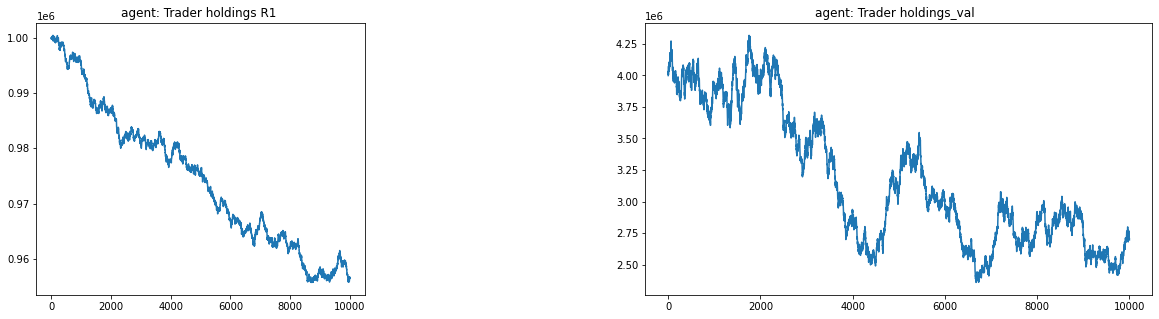

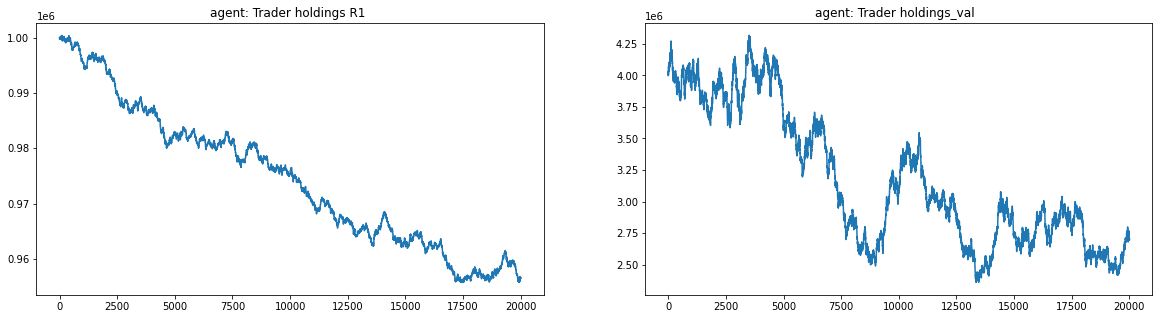

In [4]:
plot_utils.plot(events, agent='Trader', prop=['holdings', 'holdings_val'])
plot_utils.plot(events2, agent='Trader', prop=['holdings', 'holdings_val'])